# YellowBrick

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from yellowbrick.features import RadViz, Rank1D, Rank2D, ParallelCoordinates
from yellowbrick.target import ClassBalance,BalancedBinningReference
from yellowbrick.cluster import KElbowVisualizer,InterclusterDistance, SilhouetteVisualizer
from yellowbrick.regressor import ResidualsPlot, PredictionError

import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
colab=1
if colab==1:
  from google.colab import drive
  drive.mount('/content/drive', force_remount=True)
  current_folder='Colab Notebooks/ML Projects'

  dest_folder='/content/drive/My Drive/'+current_folder
  os.chdir(dest_folder)
  print('\n Current path: ' + os.getcwd())

Mounted at /content/drive

 Current path: /content/drive/My Drive/Colab Notebooks/ML Projects


In [3]:
def doKmeans(data, k):
  kmeans = KMeans(n_clusters=k, random_state=42)
  labels = kmeans.fit_predict(data)
  return labels, kmeans

def rank_features(visualizer_features, feature_names):
    sorted_indices = sorted(range(len(visualizer_features)), key=lambda i: visualizer_features[i], reverse=True)
    sorted_features = [feature_names[i] for i in sorted_indices]

    print("Ranked Features based on Shapiro Feature Importance:")
    for rank, feature in enumerate(sorted_features, start=1):
        print(f"{rank}. {feature}")


def extract_data(data, target):
  target_col = data[target]
  data = data.drop([target], axis = 1)

  feature_names = list(data.columns)
  target_names = target_col.unique()

  return data, target_col, feature_names, target_names

## Iris

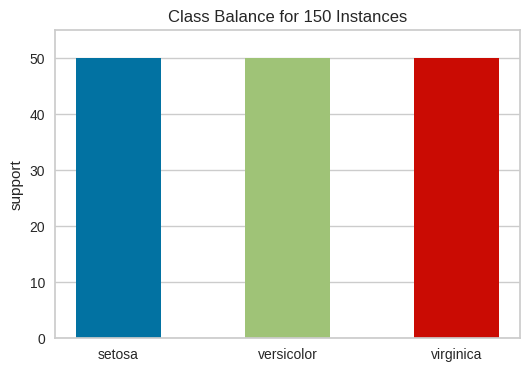

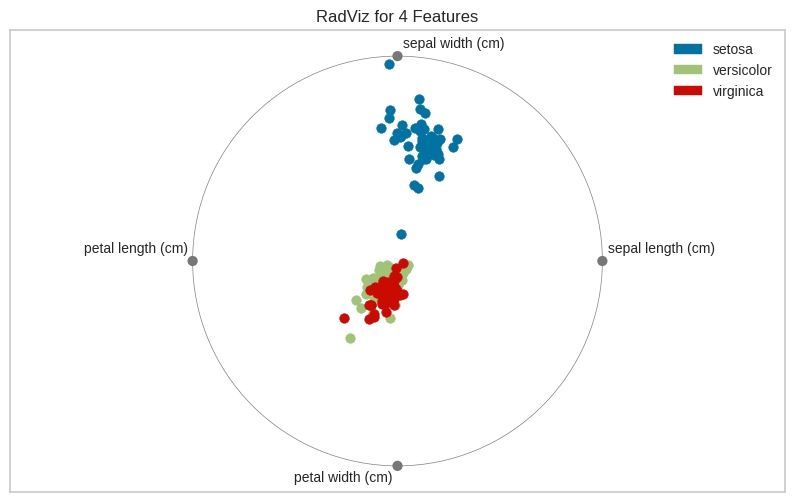

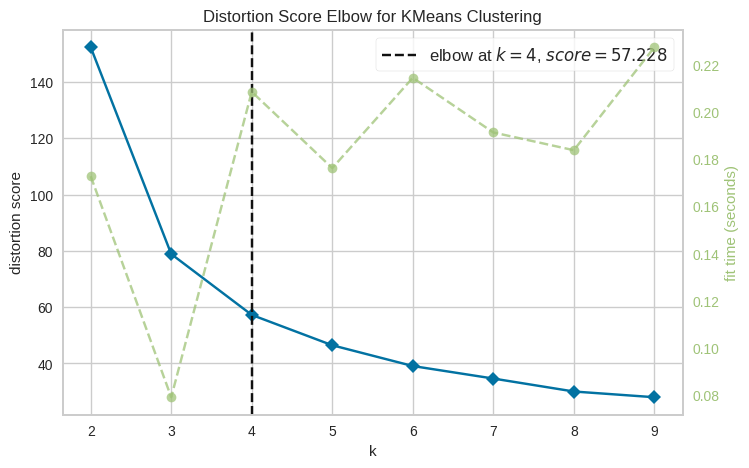

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [4]:
iris = load_iris()
iris_data, iris_target = iris.data, iris.target
iris_feature_names = iris.feature_names
iris_target_names = iris.target_names

# Class Balance
plt.figure(figsize=(6, 4))
visualizer = ClassBalance(labels=iris_target_names)
visualizer.fit(iris_target)
visualizer.show()

# RadViz plot
plt.figure(figsize=(10, 6))
visualizer = RadViz(classes=iris_target_names, features=iris_feature_names)
visualizer.fit_transform(iris_data, iris_target)
visualizer.show()

# K-means elbow method
plt.figure(figsize=(8, 5))
visualizer = KElbowVisualizer(KMeans(), k=(2,10))
visualizer.fit(iris_data)
visualizer.show()

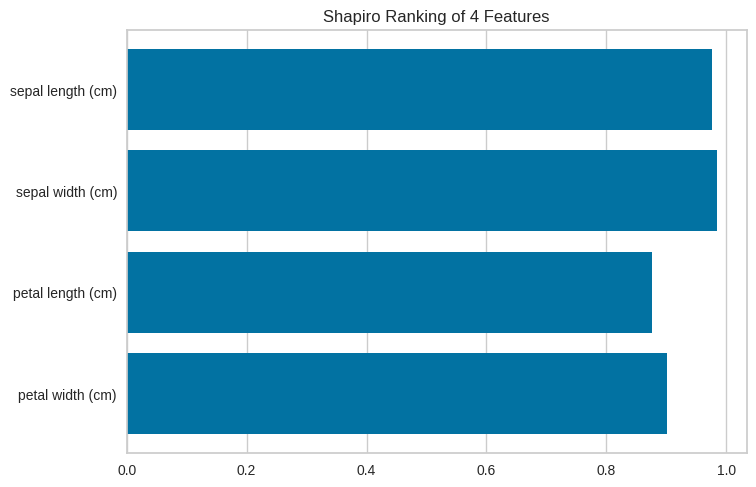

Ranked Features based on Shapiro Feature Importance:
1. sepal width (cm)
2. sepal length (cm)
3. petal width (cm)
4. petal length (cm)


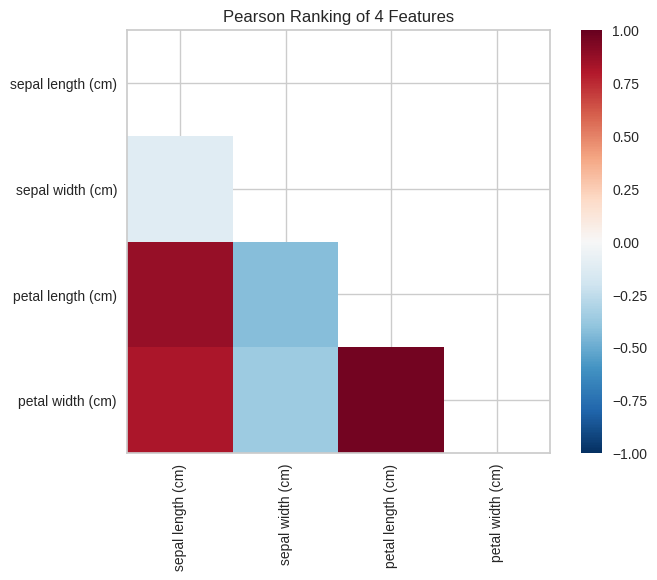

<Axes: title={'center': 'Pearson Ranking of 4 Features'}>

In [5]:
# 1 Dimensional Shapiro Feature Importance
visualizer = Rank1D(features=iris_feature_names, algorithm='shapiro')
visualizer.fit(iris_data, iris_target)
visualizer.transform(iris_data)
visualizer.show()

# 1 Dimensional Feature Rank
feature_importances = visualizer.ranks_
rank_features(feature_importances, iris_feature_names)

# 2 Dimensional Pearson Feature Importance
visualizer = Rank2D(features=iris_feature_names, algorithm='pearson')
visualizer.fit(iris_data, iris_target)
visualizer.transform(iris_data)
visualizer.show()

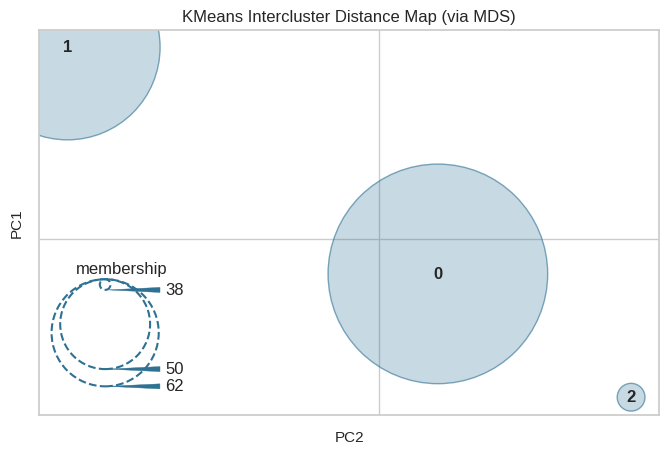

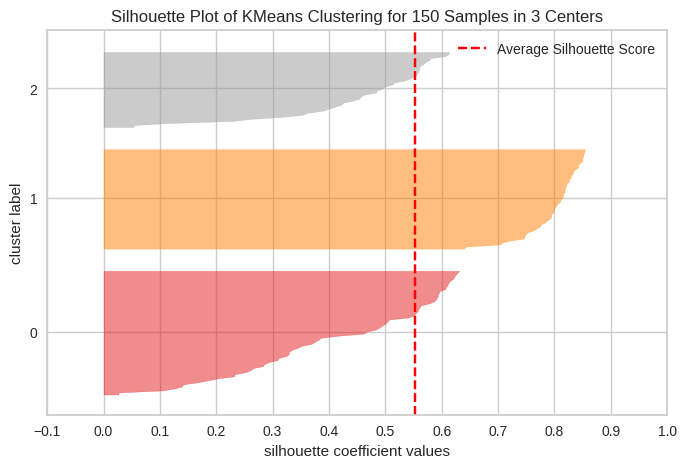

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 150 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [6]:
labels, kmeans = doKmeans(iris_data, 3)

# Intercluster Distance plot
plt.figure(figsize=(8, 5))
visualizer = InterclusterDistance(kmeans)
visualizer.fit(iris_data[:, [0, 1]])
visualizer.show()

# Cluster Silhouette plot
plt.figure(figsize=(8, 5))
visualizer = SilhouetteVisualizer(kmeans)
visualizer.fit(iris_data)
visualizer.show()

## Cybersecurity

In [7]:
cs_data = pd.read_csv('cybersecurity_data.csv')
cs_data = cs_data.drop(cs_data.columns[(cs_data == 0).all()], axis=1)

cs_target = 'class'

cs_data, cs_target, cs_feature_names, cs_target_names = extract_data(cs_data, cs_target)

cs_data.head()

,battVoltage,battTemp,battLevel,battLevelDiff,binderTransaction,binderReply,binderAcquire,binderRelease,binderActiveNodes,binderTotalNodes,...,memWritebackPages,networkTotalTXPackets,networkTotalTXBytes,networkTotalRXPackets,networkTotalRXBytes,networkTotalTXPacketsDiff,networkTotalTXBytesDiff,networkTotalRXPacketsDiff,networkTotalRXBytesDiff,permissions
0,4160,330,98,0,11817,10487,3448,1975,601,2652,...,0,237,22076,354,243540,0,0,0,0,111
1,4160,330,98,0,13004,11419,3669,2187,600,2849,...,0,248,24682,364,245109,11,2606,10,1569,112
2,4160,330,98,0,14469,12735,4111,2605,625,3290,...,0,249,24740,365,245149,1,58,1,40,112
3,4160,330,98,0,15149,13274,4236,2747,602,3409,...,0,249,24740,365,245149,0,0,0,0,112
4,4160,330,98,0,15414,13454,4244,2755,602,3417,...,0,249,24740,365,245149,0,0,0,0,112


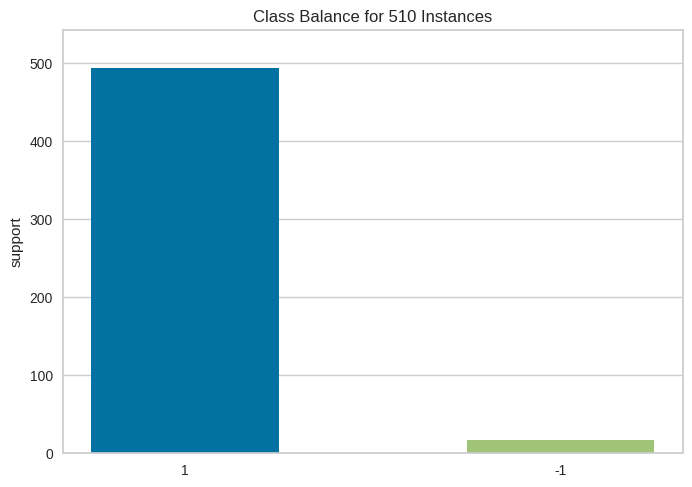

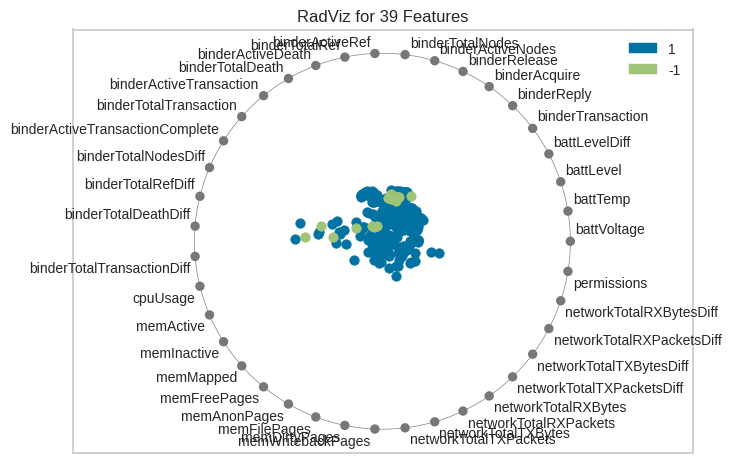

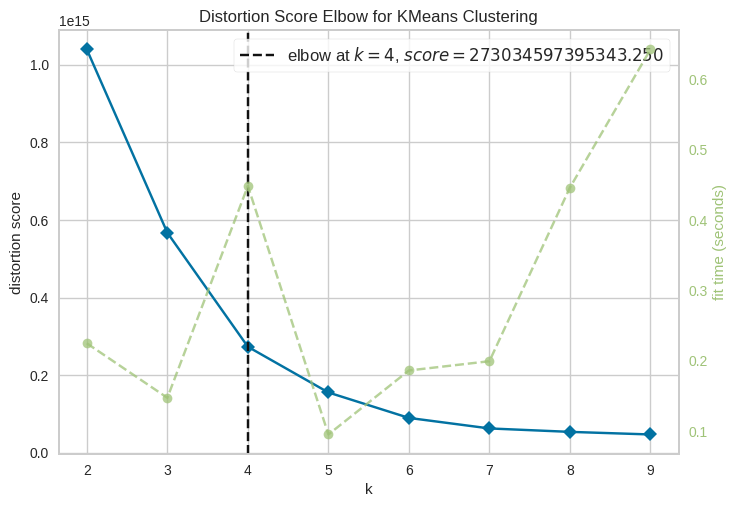

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [8]:
# Class Balance
visualizer = ClassBalance(labels=cs_target_names)
visualizer.fit(cs_target)
visualizer.show()

# RadViz plot
visualizer = RadViz(classes=cs_target_names, features=cs_feature_names)
visualizer.fit_transform(cs_data, cs_target)
visualizer.show()

# K-means elbow method
visualizer = KElbowVisualizer(KMeans(), k=(2,10))
visualizer.fit(cs_data)
visualizer.show()

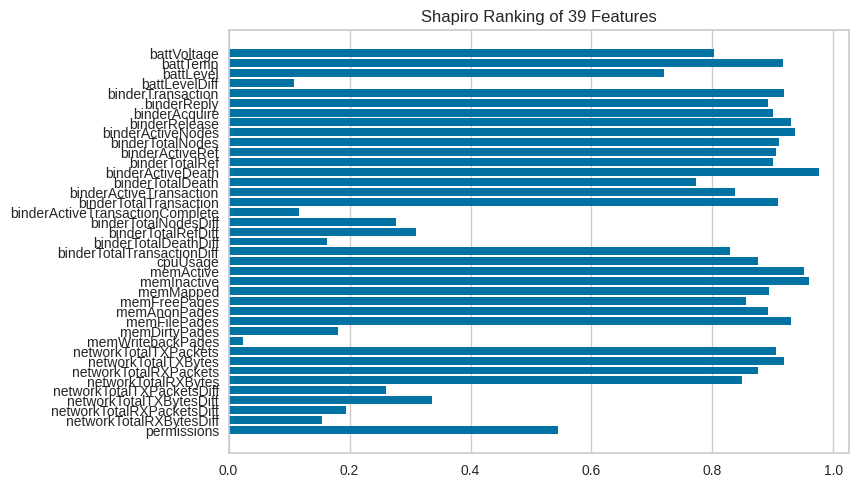

Ranked Features based on Shapiro Feature Importance:
1. binderActiveDeath
2. memInactive
3. memActive
4. binderActiveNodes
5. memFilePages
6. binderRelease
7. networkTotalTXBytes
8. binderTransaction
9. battTemp
10. binderTotalNodes
11. binderTotalTransaction
12. networkTotalTXPackets
13. binderActiveRef
14. binderTotalRef
15. binderAcquire
16. memMapped
17. memAnonPages
18. binderReply
19. networkTotalRXPackets
20. cpuUsage
21. memFreePages
22. networkTotalRXBytes
23. binderActiveTransaction
24. binderTotalTransactionDiff
25. battVoltage
26. binderTotalDeath
27. battLevel
28. permissions
29. networkTotalTXBytesDiff
30. binderTotalRefDiff
31. binderTotalNodesDiff
32. networkTotalTXPacketsDiff
33. networkTotalRXPacketsDiff
34. memDirtyPages
35. binderTotalDeathDiff
36. networkTotalRXBytesDiff
37. binderActiveTransactionComplete
38. battLevelDiff
39. memWritebackPages


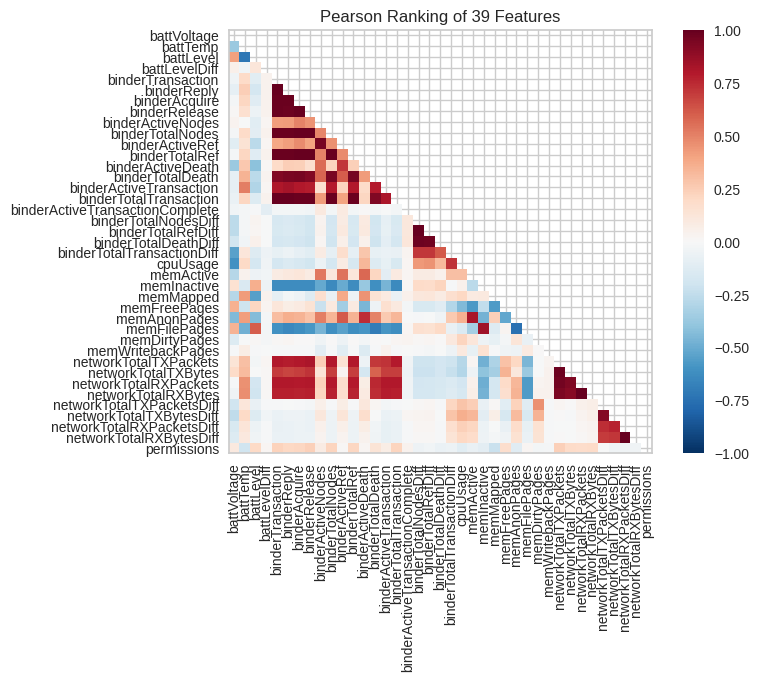

<Axes: title={'center': 'Pearson Ranking of 39 Features'}>

In [9]:
# 1 Dimensional Shapiro Feature Importance
visualizer = Rank1D(features=cs_feature_names, algorithm='shapiro')
visualizer.fit(cs_data, cs_target)
visualizer.transform(cs_data)
visualizer.show()

# 1 Dimensional Feature Rank
feature_importances = visualizer.ranks_
rank_features(feature_importances, cs_feature_names)

# 2 Dimensional Pearson Feature Importance
visualizer = Rank2D(features=cs_feature_names, algorithm='pearson')
visualizer.fit(cs_data, cs_target)
visualizer.transform(cs_data)
visualizer.show()

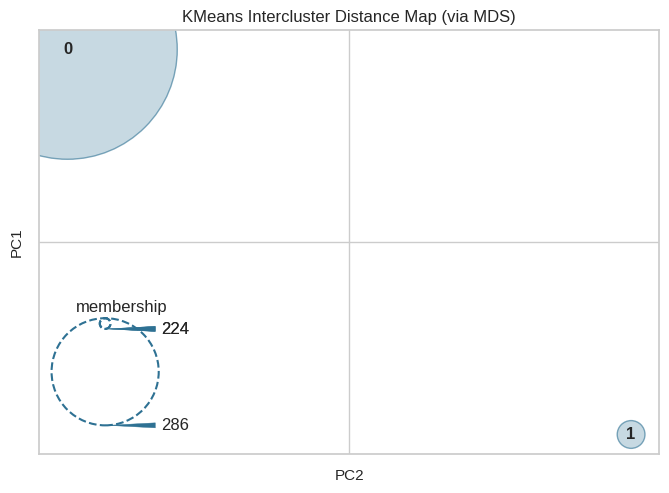

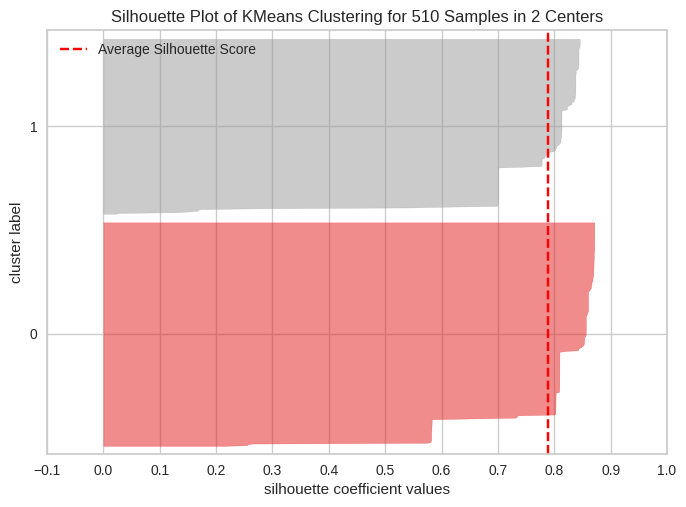

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 510 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [10]:
labels, kmeans = doKmeans(cs_data, 2)

# Intercluster Distance plot
visualizer = InterclusterDistance(kmeans)
visualizer.fit(cs_data[['binderActiveDeath', 'battTemp']])
visualizer.show()

# Cluster Silhouette plot
visualizer = SilhouetteVisualizer(kmeans)
visualizer.fit(cs_data)
visualizer.show()

## HFT AAPL

In [11]:
hft_data = pd.read_csv('HFT_AAPL_data.csv')
hft_target = 'marketClose'
hft_data = hft_data.drop(['Unnamed: 0', 'Date'], axis = 1)

hft_data, hft_target, hft_feature_names, hft_target_names = extract_data(hft_data, hft_target)

hft_data.head()

,marketAverage,marketChangeOverTime,marketHigh,marketLow,marketNotional,marketNumberOfTrades,marketOpen,marketVolume
0,167.058,0.000000,167.55,166.67,1.319461e+08,1766,166.93,789821
1,167.182,0.000742,167.42,166.80,2.853055e+07,1143,167.21,170656
2,167.051,-0.000042,167.20,166.88,2.232776e+07,1016,167.17,133658
3,166.945,-0.000676,167.11,166.77,2.014459e+07,839,166.97,120666
4,167.045,-0.000078,167.19,166.92,1.707804e+07,843,166.96,102236


Balanced Binning Reference


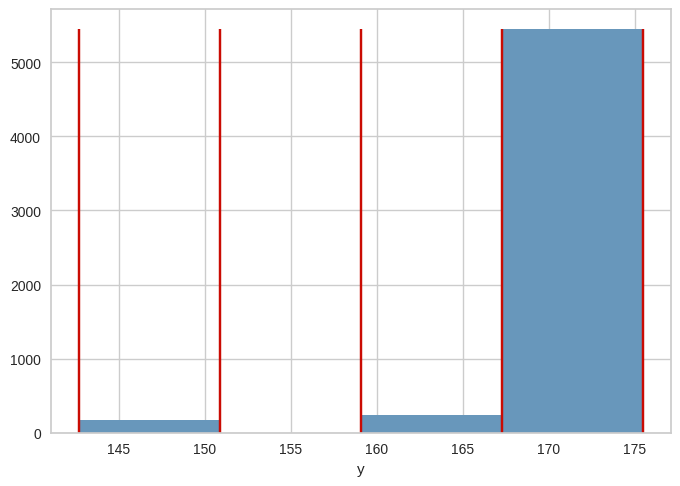

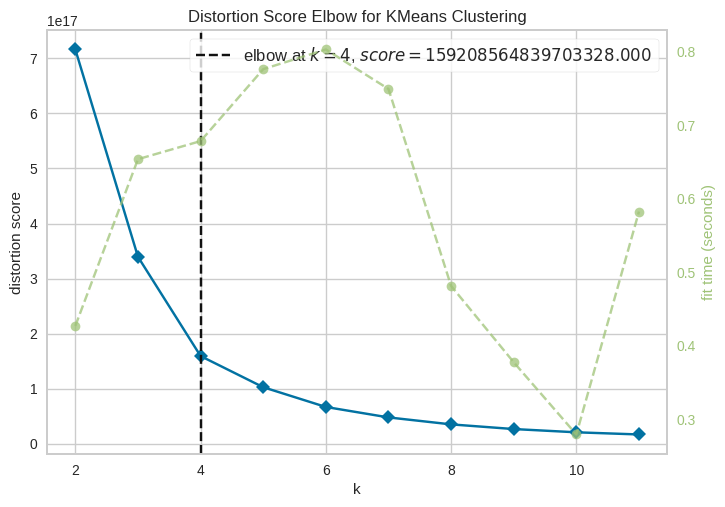

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
# Balanced Binning plot
print("Balanced Binning Reference")
visualizer = BalancedBinningReference()
visualizer.fit(hft_target)
visualizer.show()

# K-means elbow method
visualizer = KElbowVisualizer(KMeans(), k=(2,12))
visualizer.fit(hft_data)
visualizer.show()

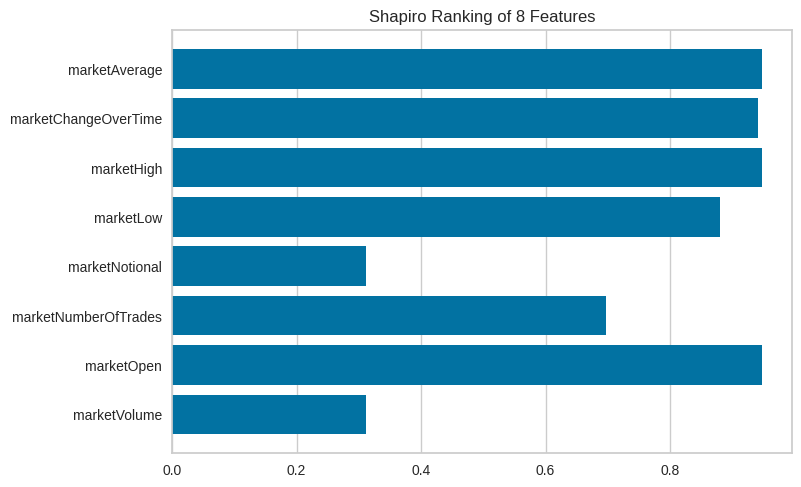

Ranked Features based on Shapiro Feature Importance:
1. marketOpen
2. marketHigh
3. marketAverage
4. marketChangeOverTime
5. marketLow
6. marketNumberOfTrades
7. marketVolume
8. marketNotional


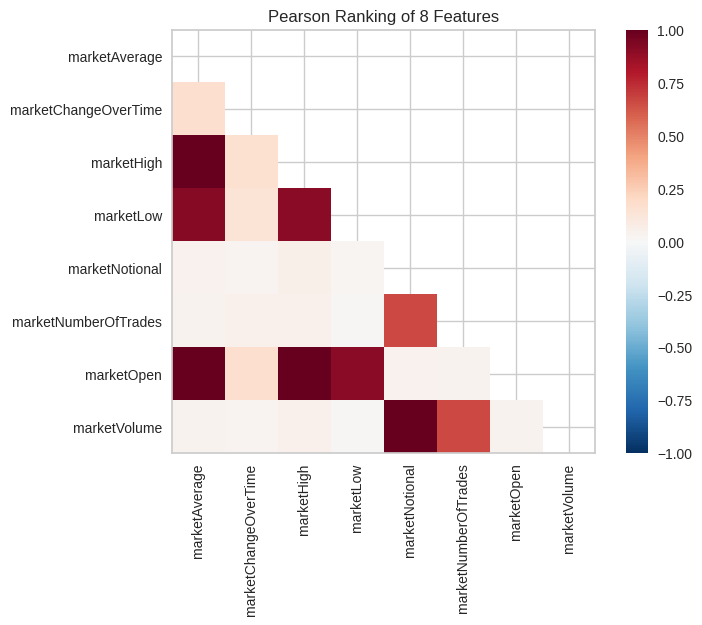

<Axes: title={'center': 'Pearson Ranking of 8 Features'}>

In [13]:
# 1 Dimensional Shapiro Feature Importance
visualizer = Rank1D(features=hft_feature_names, algorithm='shapiro')
visualizer.fit(hft_data, hft_target)
visualizer.transform(hft_data)
visualizer.show()

# 1 Dimensional Feature Rank
feature_importances = visualizer.ranks_
rank_features(feature_importances, hft_feature_names)

# 2 Dimensional Pearson Feature Importance
visualizer = Rank2D(features=hft_feature_names, algorithm='pearson')
visualizer.fit(hft_data, hft_target)
visualizer.transform(hft_data)
visualizer.show()

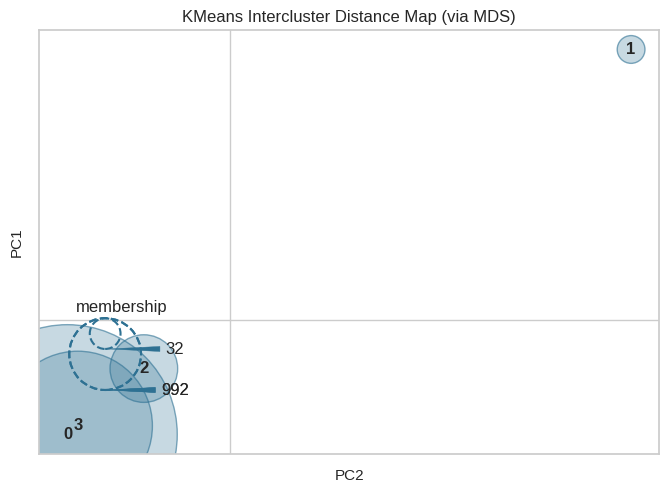

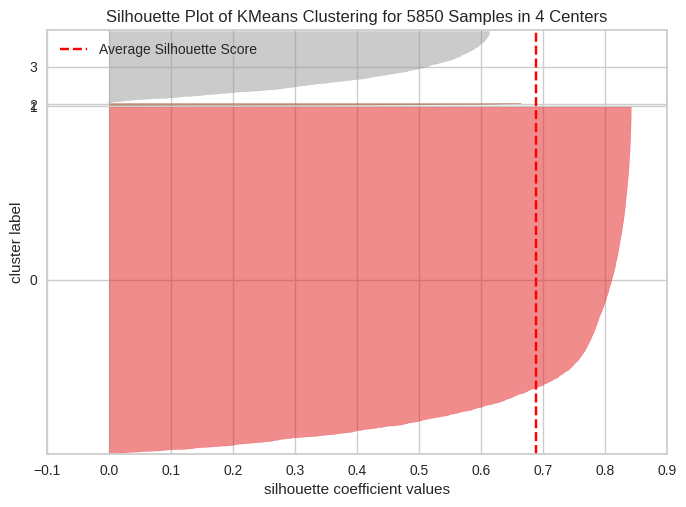

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 5850 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [14]:
labels, kmeans = doKmeans(hft_data, 4)

# Intercluster Distance Plot
visualizer = InterclusterDistance(kmeans)
visualizer.fit(hft_data[['marketOpen', 'marketVolume']])
visualizer.show()

# Silhouette Visualizer
visualizer = SilhouetteVisualizer(kmeans)
visualizer.fit(hft_data)
visualizer.show()

## Breast Wisc

In [15]:
bw_data = pd.read_csv('breast_wisc_dataset.csv')
bw_target = 'label'

bw_data, bw_target, bw_feature_names, bw_target_names = extract_data(bw_data, bw_target)

bw_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


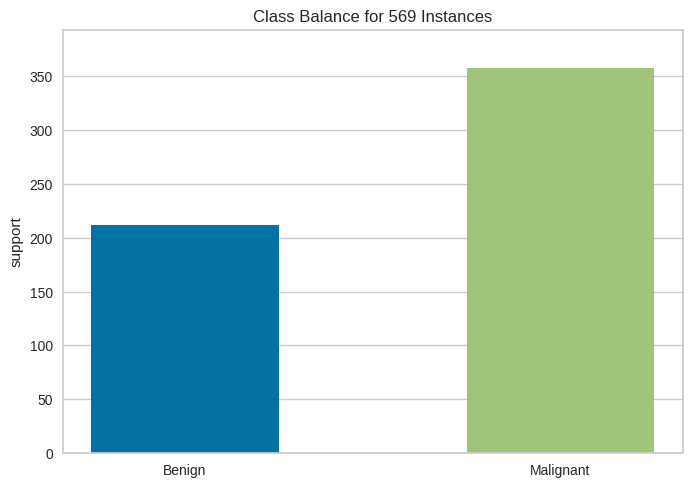

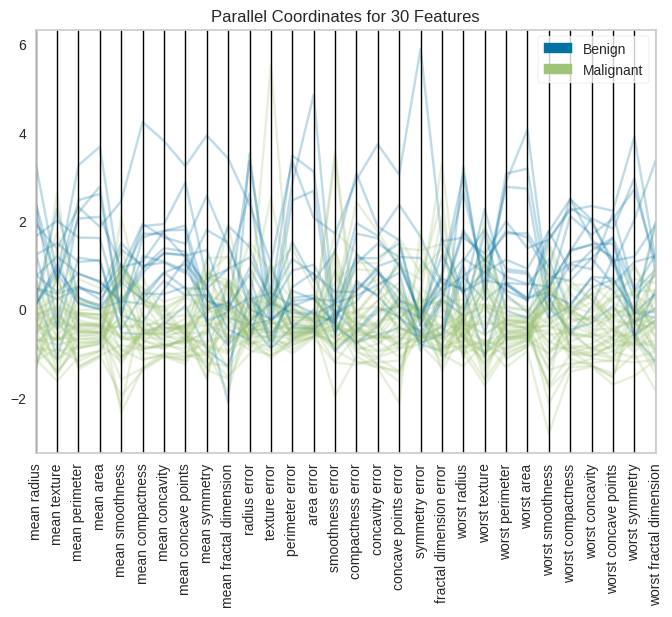

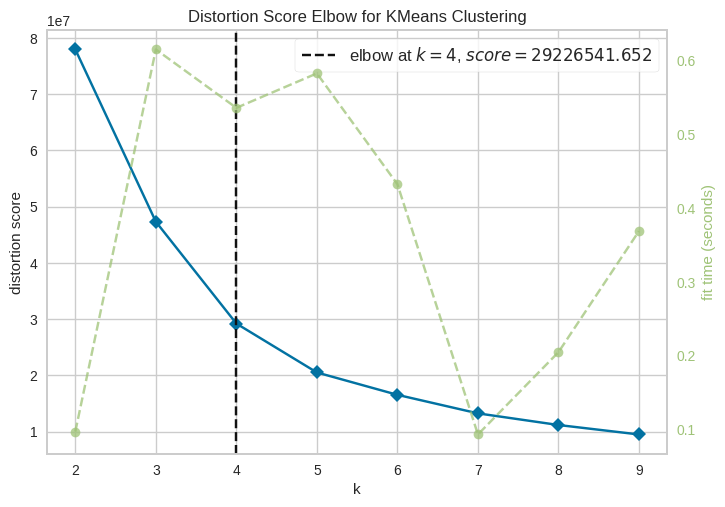

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
# Class Balance
visualizer = ClassBalance(labels=bw_target_names)
visualizer.fit(bw_target)
visualizer.show()

# Parallel Coordinates
visualizer = ParallelCoordinates(features=bw_data.columns, normalize='standard', sample=0.1, shuffle=True)
plt.xticks(rotation=90)
visualizer.fit_transform(bw_data, bw_target)
visualizer.show()

# K-means elbow method
visualizer = KElbowVisualizer(KMeans(), k=(2,10))
visualizer.fit(bw_data)
visualizer.show()

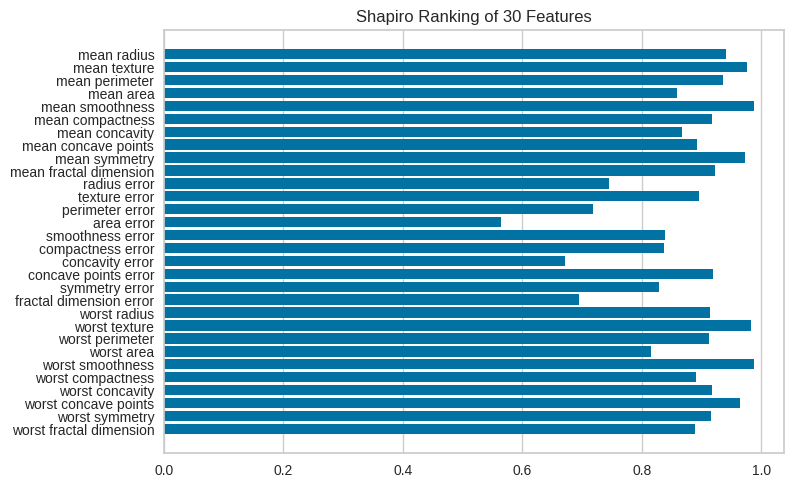

Ranked Features based on Shapiro Feature Importance:
1. worst smoothness
2. mean smoothness
3. worst texture
4. mean texture
5. mean symmetry
6. worst concave points
7. mean radius
8. mean perimeter
9. mean fractal dimension
10. concave points error
11. worst concavity
12. mean compactness
13. worst symmetry
14. worst radius
15. worst perimeter
16. texture error
17. mean concave points
18. worst compactness
19. worst fractal dimension
20. mean concavity
21. mean area
22. smoothness error
23. compactness error
24. symmetry error
25. worst area
26. radius error
27. perimeter error
28. fractal dimension error
29. concavity error
30. area error


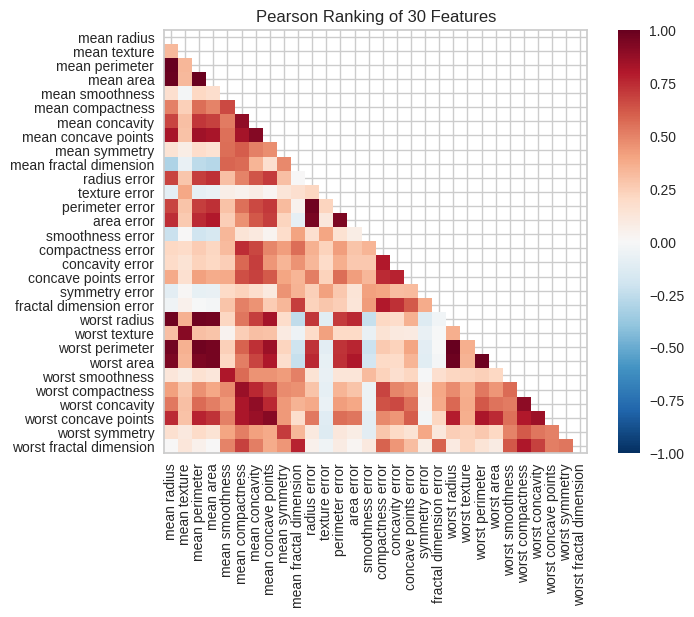

<Axes: title={'center': 'Pearson Ranking of 30 Features'}>

In [17]:
# 1 Dimensional Shapiro Feature Importance
visualizer = Rank1D(features=bw_feature_names, algorithm='shapiro')
visualizer.fit(bw_data, bw_target)
visualizer.transform(bw_data)
visualizer.show()

# 1 Dimensional Feature Rank
feature_importances = visualizer.ranks_
rank_features(feature_importances, bw_feature_names)

# 2 Dimensional Pearson Feature Importance
visualizer = Rank2D(features=bw_feature_names, algorithm='pearson')
visualizer.fit(bw_data, bw_target)
visualizer.transform(bw_data)
visualizer.show()

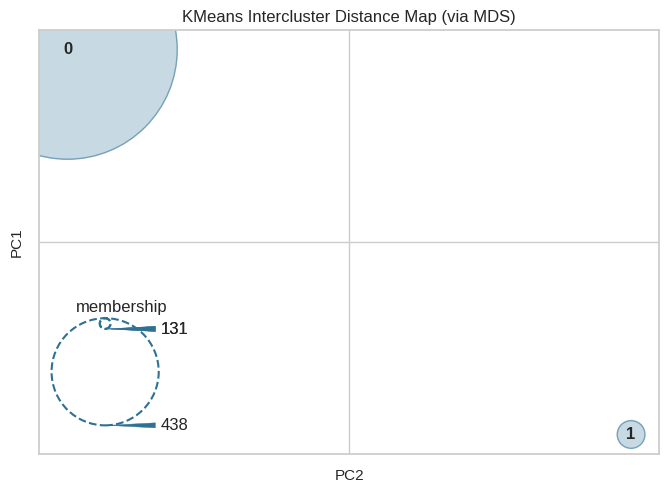

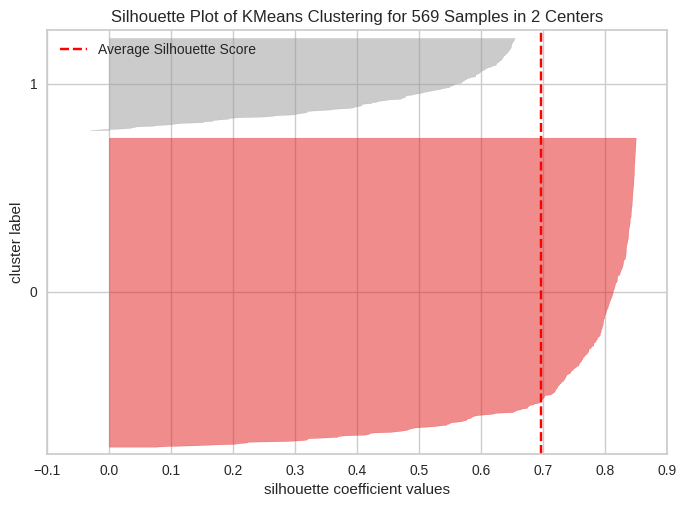

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 569 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [18]:
labels, kmeans = doKmeans(bw_data, 2)

# Intercluster Distance plot
visualizer = InterclusterDistance(kmeans)
visualizer.fit(bw_data[['mean texture', 'mean smoothness']])
visualizer.show()

# Cluster Silhouette plot
visualizer = SilhouetteVisualizer(kmeans)
visualizer.fit(bw_data)
visualizer.show()


## Data Science Salaries


In [19]:
def encode_string_columns(dataframe):
    df_encoded = dataframe.copy()

    for column in df_encoded.columns:
        if df_encoded[column].dtype == 'object':
            df_encoded[column] = pd.factorize(df_encoded[column])[0]

    return df_encoded

In [20]:
ds_data = pd.read_csv('ds_salaries.csv')
ds_data = ds_data.drop(['salary', 'salary_currency'], axis=1)
ds_data = encode_string_columns(ds_data)

ds_target = 'salary_in_usd'

ds_data, ds_target, ds_feature_names, ds_target_names = extract_data(ds_data, ds_target)

ds_data.head()

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size
0,2023,0,0,0,0,100,0,0
1,2023,1,1,1,1,100,1,1
2,2023,1,1,1,1,100,1,1
3,2023,0,0,2,2,100,2,2
4,2023,0,0,2,2,100,2,2


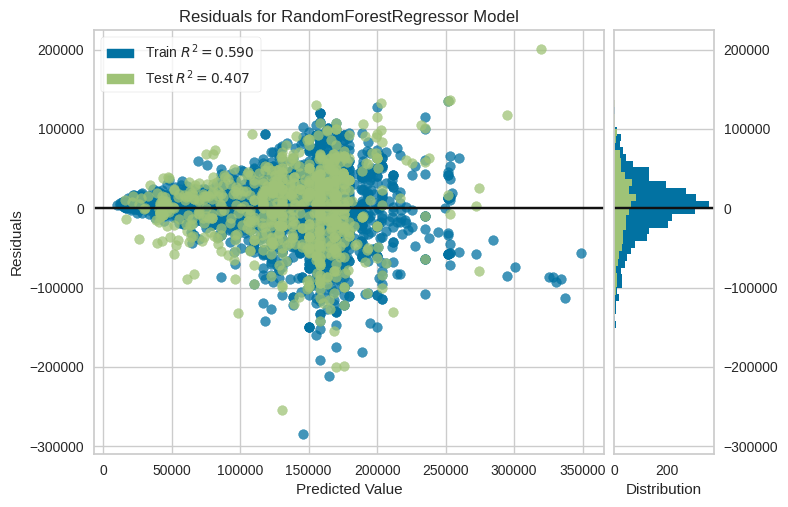

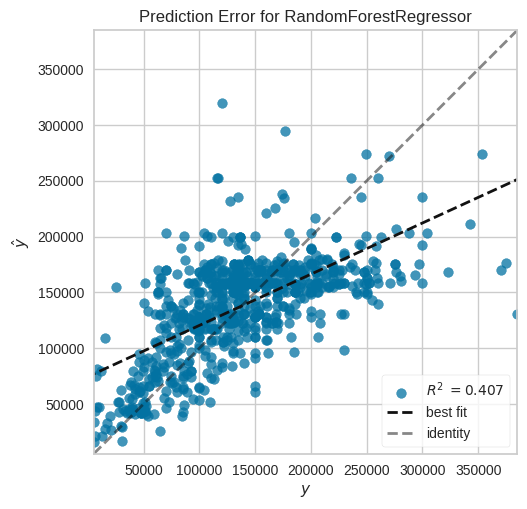

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [21]:
X_train, X_test, y_train, y_test = train_test_split(ds_data, ds_target, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Residual Plot
residuals_plot = ResidualsPlot(model)
residuals_plot.fit(X_train, y_train)
residuals_plot.score(X_test, y_test)
residuals_plot.show()

# Prediction Error
prediction_error = PredictionError(model)
prediction_error.fit(X_train, y_train)
prediction_error.score(X_test, y_test)
prediction_error.show()

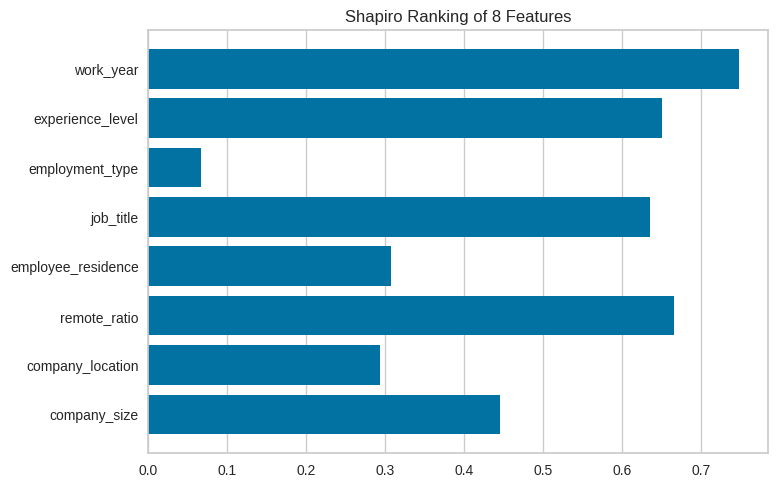

Ranked Features based on Shapiro Feature Importance:
1. work_year
2. remote_ratio
3. experience_level
4. job_title
5. company_size
6. employee_residence
7. company_location
8. employment_type


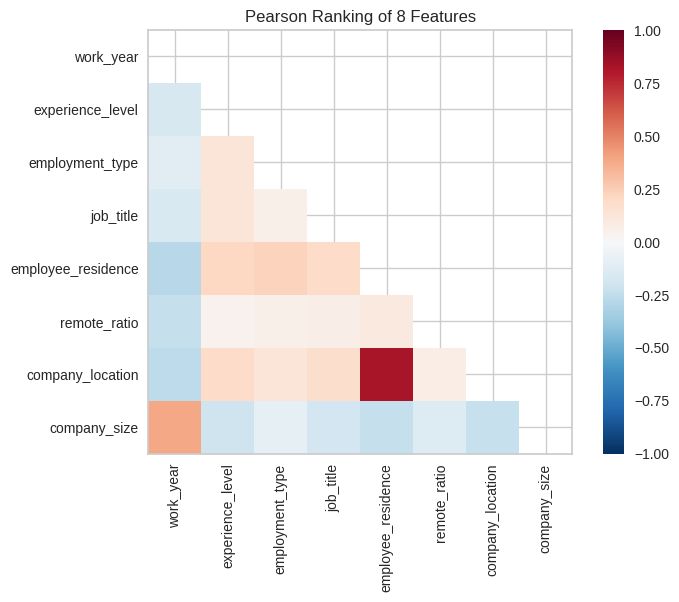

<Axes: title={'center': 'Pearson Ranking of 8 Features'}>

In [22]:
# 1 Dimensional Shapiro Feature Importance
visualizer = Rank1D(features=ds_feature_names, algorithm='shapiro')
visualizer.fit(ds_data, ds_target)
visualizer.transform(ds_data)
visualizer.show()

# 1 Dimensional Feature Rank
feature_importances = visualizer.ranks_
rank_features(feature_importances, ds_feature_names)

# 2 Dimensional Pearson Feature Importance
visualizer = Rank2D(features=ds_feature_names, algorithm='pearson')
visualizer.fit(ds_data, ds_target)
visualizer.transform(ds_data)
visualizer.show()